# 02 — Exploratory Data Analysis (EDA)

**Goal:** Understand data distributions, relationships, and candidate features for modeling.

**Checklist (edit as you go):**
- [x] Load cleaned dataset
- [x] Summary stats (describe)
- [x] Points distribution
- [ ] Home vs Away scoring
- [x] Correlation heatmap
- [x] Save plots to `../img/`


In [6]:
# Setup & data load
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

CLEAN_PATH = Path("../data/processed/team_games_clean.csv")
IMG_DIR = Path("../img"); IMG_DIR.mkdir(parents=True, exist_ok=True)

df = pd.read_csv(CLEAN_PATH, parse_dates=["game_date"])
print("Loaded:", CLEAN_PATH, "| shape:", df.shape)
df.head(3)


Loaded: ../data/processed/team_games_clean.csv | shape: (3514, 35)


,season_id,team_id,team_abbreviation,team_name,game_id,game_date,matchup,wl,pts,fg_pct,...,pf,plus_minus,home,rest_days,opponent_team_id,opponent_team_abbreviation,opponent_pts,opponent_fg_pct,opponent_reb,opponent_tov
0,22023,1.610613e+09,DEN,Denver Nuggets,22300061,2023-10-24,DEN vs. LAL,W,119,0.527,...,15,12.0,1,3.0,1.610613e+09,LAL,107,0.456,44,11
1,22023,1.610613e+09,LAL,Los Angeles Lakers,22300061,2023-10-24,LAL @ DEN,L,107,0.456,...,18,-12.0,0,3.0,1.610613e+09,DEN,119,0.527,42,11
2,22023,1.610613e+09,GSW,Golden State Warriors,22300062,2023-10-24,GSW vs. PHX,L,104,0.356,...,23,-4.0,1,3.0,1.610613e+09,PHX,108,0.442,60,19


## 1) Summary stats

In [7]:
# basic summary stats
print("Dataset overview:")
print(f"Shape: {df.shape}")
print(f"Date range: {df['game_date'].min()} to {df['game_date'].max()}")
print(f"Unique teams: {df['team_abbreviation'].nunique()}")
print(f"Unique games: {df['game_id'].nunique()}")
print()

# key numerical columns summary
key_cols = ['pts', 'fg_pct', 'reb', 'ast', 'tov', 'home', 'rest_days']
print("Summary stats for key columns:")
print(df[key_cols].describe().round(2))

Dataset overview:
Shape: (3514, 35)
Date range: 2023-10-24 00:00:00 to 2024-04-14 00:00:00
Unique teams: 61
Unique games: 1757

Summary stats for key columns:
           pts   fg_pct      reb      ast      tov    home  rest_days
count  3514.00  3514.00  3514.00  3514.00  3514.00  3514.0    3514.00
mean    113.86     0.47    44.06    26.37    13.54     0.5       2.34
std      12.78     0.05     6.77     5.06     4.04     0.5       1.34
min      73.00     0.28    23.00    10.00     2.00     0.0       1.00
25%     105.00     0.44    40.00    23.00    11.00     0.0       2.00
50%     113.00     0.47    44.00    26.00    13.00     0.5       2.00
75%     122.00     0.51    48.00    30.00    16.00     1.0       3.00
max     168.00     0.67    74.00    50.00    31.00     1.0      14.00


## 2) Points distribution


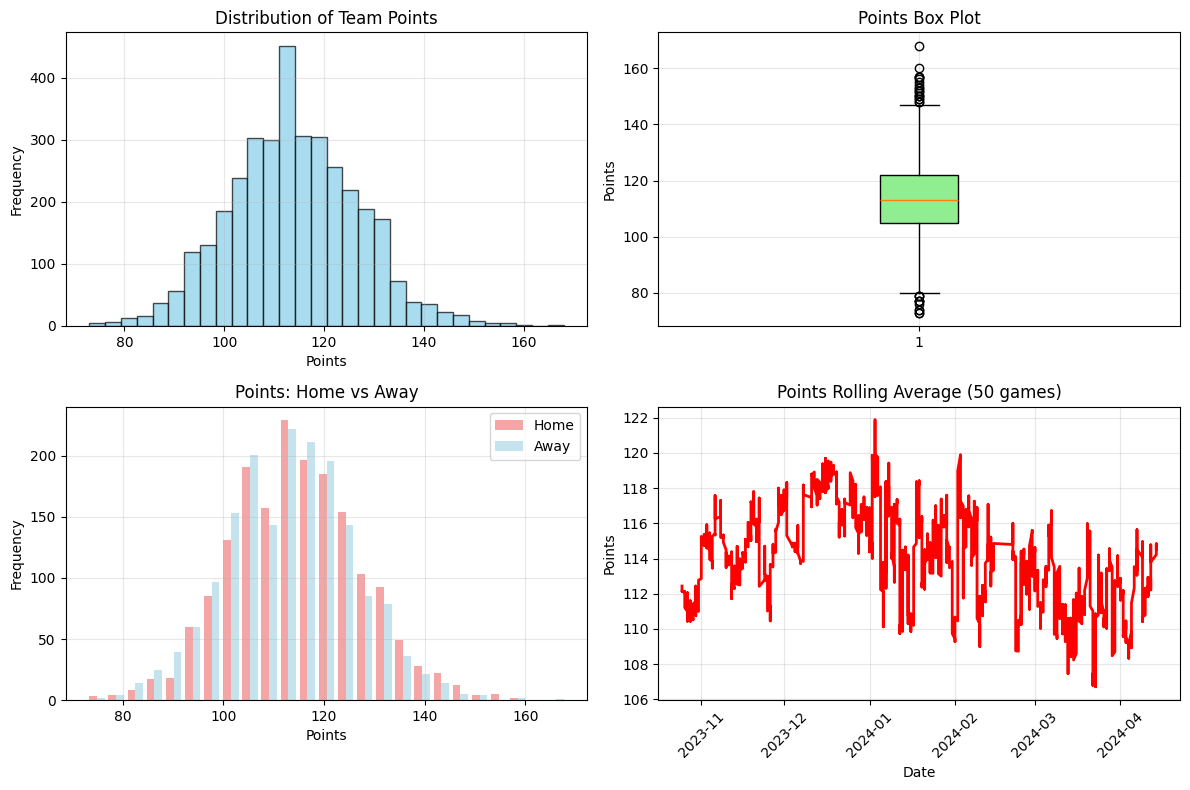

Points distribution summary:
Mean: 113.9
Median: 113.0
Std dev: 12.8
Min: 73
Max: 168
Home avg: 114.7
Away avg: 113.0
Home advantage: 1.6 points


In [8]:
plt.figure(figsize=(12, 8))

# histogram
plt.subplot(2, 2, 1)
plt.hist(df['pts'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Team Points')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# box plot
plt.subplot(2, 2, 2)
plt.boxplot(df['pts'], patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Points Box Plot')
plt.ylabel('Points')
plt.grid(True, alpha=0.3)

# points by home/away
plt.subplot(2, 2, 3)
home_pts = df[df['home'] == 1]['pts']
away_pts = df[df['home'] == 0]['pts']
plt.hist([home_pts, away_pts], bins=25, alpha=0.7, label=['Home', 'Away'], 
         color=['lightcoral', 'lightblue'])
plt.title('Points: Home vs Away')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

# points over time (rolling average)
plt.subplot(2, 2, 4)
df_sorted = df.sort_values('game_date')
rolling_avg = df_sorted['pts'].rolling(window=50, center=True).mean()
plt.plot(df_sorted['game_date'], rolling_avg, color='red', linewidth=2)
plt.title('Points Rolling Average (50 games)')
plt.xlabel('Date')
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(IMG_DIR / 'points_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

# summary stats for points
print("Points distribution summary:")
print(f"Mean: {df['pts'].mean():.1f}")
print(f"Median: {df['pts'].median():.1f}")
print(f"Std dev: {df['pts'].std():.1f}")
print(f"Min: {df['pts'].min()}")
print(f"Max: {df['pts'].max()}")
print(f"Home avg: {home_pts.mean():.1f}")
print(f"Away avg: {away_pts.mean():.1f}")
print(f"Home advantage: {home_pts.mean() - away_pts.mean():.1f} points")


The data shows teams score 113.9 points on average with home teams getting about 1.6 points more than away teams. Scoring ranges from 73 to 168 points. Distribution looks normal.

## 3) Home vs Away scoring


In [9]:
# TO-DO

## 4) Correlation heatmap


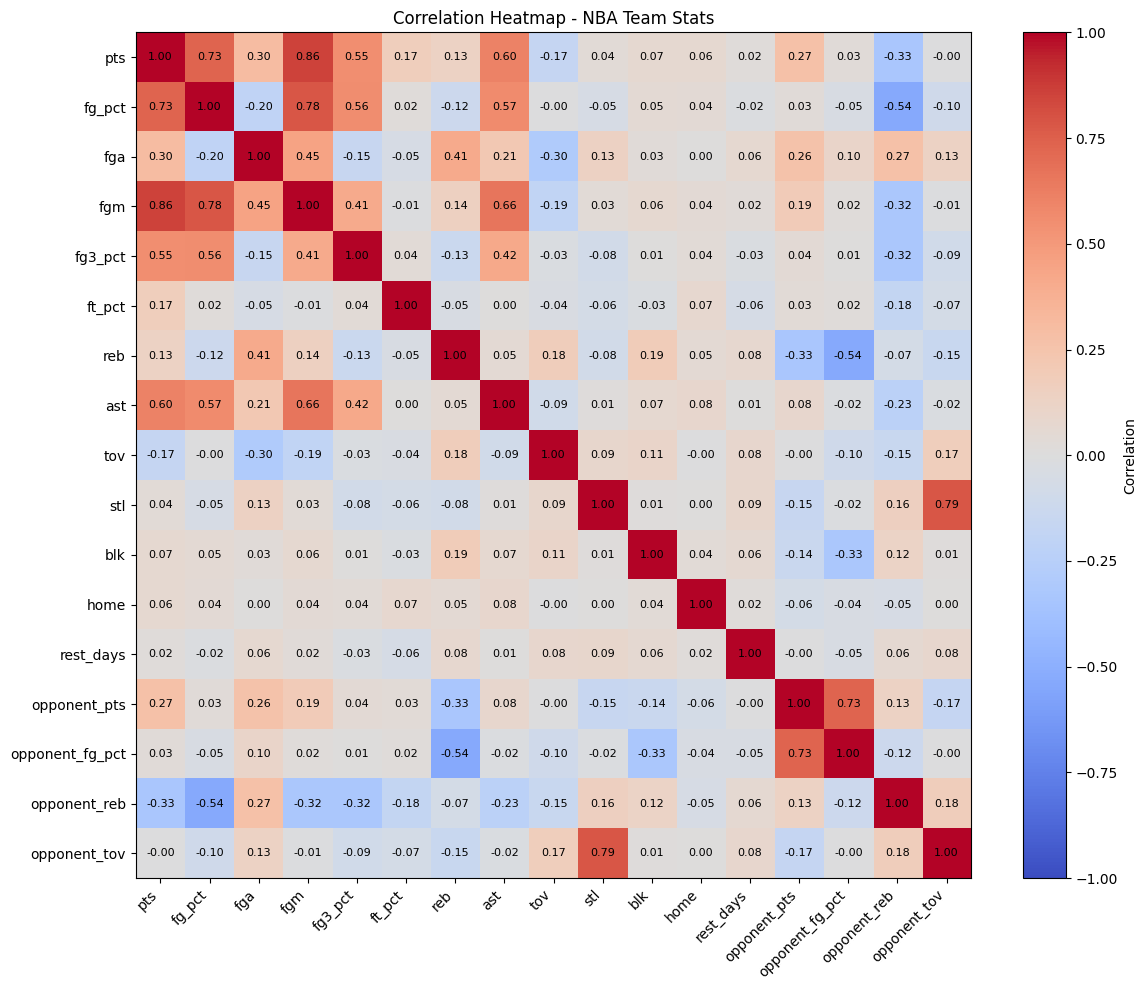

Top correlations with points:
pts             1.000000
fgm             0.859315
fg_pct          0.731189
ast             0.602291
fg3_pct         0.551110
fga             0.300039
opponent_pts    0.266282
ft_pct          0.166947
reb             0.127637
blk             0.068740
Name: pts, dtype: float64

Bottom correlations with points:
opponent_fg_pct    0.030167
rest_days          0.017047
opponent_tov      -0.004483
tov               -0.170787
opponent_reb      -0.334359
Name: pts, dtype: float64


In [10]:
import numpy as np

# numerical columnns
numeric_cols = ['pts', 'fg_pct', 'fga', 'fgm', 'fg3_pct', 'ft_pct', 'reb', 'ast', 'tov', 'stl', 'blk', 'home', 'rest_days', 'opponent_pts', 'opponent_fg_pct', 'opponent_reb', 'opponent_tov']

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', 
                ha='center', va='center', fontsize=8)

plt.title('Correlation Heatmap - NBA Team Stats')
plt.tight_layout()
plt.savefig(IMG_DIR / 'correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

# top/bottom correlations with points
pts_corr = corr_matrix['pts'].sort_values(ascending=False)
print("Top correlations with points:")
print(pts_corr.head(10))
print()
print("Bottom correlations with points:")
print(pts_corr.tail(5))
